In [1]:
import PyPDF2
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
%config InlineBackend.figure_format = 'svg'

def simpleaxis(ax,xlab_,ylab_):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xlabel(xlab_,fontsize=ff) 
    ax.set_ylabel(ylab_,fontsize=ff)        
    plt.tight_layout()

# # creating an object 
# file = open('Kenneth M Hoffman, Ray Kunze - Linear Algebra -Prentice Hall (1971).pdf', 'rb')



# # creating a pdf reader object
# fileReader = PyPDF2.PdfFileReader(file)



# # print the number of pages in pdf file
# print(fileReader.numPages)

In [2]:
# from statannotations.Annotator import Annotator


In [3]:
# file = open('David J. Griffiths - Introduction to Electrodynamics (1999, Prentice-Hall) - libgen.lc.pdf', 'rb')
# fileReader = PyPDF2.PdfFileReader(file)
# print(fileReader.numPages)

In [4]:
# import PyPDF2

# def Read(startPage, endPage):
#     global text
#     text = []
#     cleanText = ""
# import PyPDF2

# def Read(startPage, endPage):
#     global text
#     text = []
#     cleanText = ""
#     pdfFileObj = open('David J. Griffiths - Introduction to Electrodynamics (1999, Prentice-Hall) - libgen.lc.pdf', 'rb')
#     pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
#     while startPage <= endPage:
#         pageObj = pdfReader.getPage(startPage)
#         text += pageObj.extractText()
#         startPage += 1
#     pdfFileObj.close()
#     for myWord in text:
#         if myWord != '\n':
#             cleanText += myWord
#     text = cleanText.split()
#     return text





In [5]:
# fileReader
import re
import pdfplumber

# file = pdfplumber.open('David J. Griffiths - Introduction to Electrodynamics (1999, Prentice-Hall) - libgen.lc.pdf')
file = pdfplumber.open('Kenneth M Hoffman, Ray Kunze - Linear Algebra -Prentice Hall (1971).pdf')



for x in range(400,500):
#     Read(x,x+1)
#     text_=pageObj.extractText()
    text_=file.pages[x].extract_text()
    
    if 'Index' in text_ :
        text_=text_.replace('Index','')
        text_=text_.replace('INDEX','')
# #         text_=text_.replace('Ex.','')
# #         text_=text_.replace('( ','(')
# #         text_=text_.replace('( ','(')
# #         text_=text_.replace('() ',',')
# #     text_=text_.lower()
        text_ = ''.join([i if not i.isdigit() else ' ' for i in text_])

        text_=text_.replace(':', ' ')
#         text_=re.split(' ',text_)

#         text_=[x for x in text_ if len(x)>1]
# # #         xx=''
# #         for x in text_ :
# #             if len(x)>1:
#                 xx=xx+' '+x
        text_=text_.split('\n')

        text_=[x.replace('\n','') for x in text_]
        print(text_)
#         text_=[x for x in text_ if len(x)>2]
        print([x for x in text_ if x[0].isupper()==1])
        break


[' ', 'A  Bessel’s  inequality,      ', 'Bilinear  form,     ,    ,     ', 'Adjoint  ', 'diagonalization  of,     ', 'classical,     ,      ', 'group  preserving,      ', 'of transformation,      ', 'matrix  of,     ', 'Admissible  sltbspace,      ', 'non-degenerate  (non-singular),      ', 'Algebra,      ', 'positive  definite,      ', 'of formal  power  series,      ', 'rank  of,     ', 'self-adjoint,      ', 'signature  of,     ', 'Algebraically  closed  field,      ', 'skew-symmetric,      ', 'Alternating  n-linear  function,     ,     ', 'symmetric,      ', 'Annihilator  ', 'of subset,      ', 'of sum  and intersection,     (Ex.    ) ', 'C ', 'of vector  (T-annihilator),     ,     ,      ', 'Approximation,      ', 'Cauchy-Schwars  inequality,      ', 'Associativity,    ', 'Cayley-Hamilton  theorem,     ,     ', 'of matrix  multiplicat,ion,    ,    ', 'of vector  addition,      Cayley  transform,     (Ex.   ) ', 'Augmented  matrix,      Characteristic  ', 'Axiom  of choice,       o

In [6]:
text_[11]

'Algebra,      '

In [7]:
#         text_=[x for x in text_ if len(x)>1]
# # #         xx=''
# #         for x in text_ :
# #             if len(x)>1:
#                 xx=xx+' '+x

In [8]:
x0 = 0    # Distance of left side of character from left side of page.
x1 = 0.4  # Distance of right side of character from left side of page.
y0 = 0  # Distance of bottom of character from bottom of page.
y1 = 1  # Distance of top of character from bottom of page.

import pdfplumber

# file = pdfplumber.open('Kenneth M Hoffman, Ray Kunze - Linear Algebra -Prentice Hall (1971).pdf')
file = pdfplumber.open('Linear Algebra, 2Nd Edition - Kenneth Hoffmann And Ray Kunze.pdf')

node_list = []


for x in range(400,415):
    all_content = []
    page = file.pages[x]
    
    width = page.width
    height = page.height

    # Crop pages
    left_bbox = (0*float(width), y0*float(height), x1*float(width), y1*float(height))
    page_crop = page.crop(bbox=left_bbox)
    left_text = page_crop.extract_text()

    right_bbox = (x1*float(width), y0*float(height), 1*float(width), y1*float(height))
    page_crop = page.crop(bbox=right_bbox)
    right_text = page_crop.extract_text()
    page_context = '\n'.join([left_text, right_text])
    all_content.append(page_context)

    text_=all_content#.extract_text()

    if 'Index' in text_[0]:
        new_text_ = text_[0].split(',')
        new_text_ = list(new_text_)

        for y in range(len(new_text_)):
            if new_text_[y].isdigit():
                pass
            else:
                result = ''.join([i for i in new_text_[y] if not i.isdigit()])
                node_list.append(result.replace('\n',''))

node_list = [name for name in node_list if name.strip()]
node_list = [name.lstrip() for name in node_list]
node_list = [name for name in node_list if name[0].isupper()]

In [9]:
for i,node in enumerate(node_list):
    node = ' '.join( [w for w in node.split() if len(w)>1] )
    node = node.split(':')
    node = node[0].replace('Index ','')
    node_list[i] = node


In [10]:
page_list = [[] for i in range(192)] 
node_list=[x.lower() for x in node_list]

dict_node_appearances={};
for node in node_list:
    dict_node_appearances[node]=[] 
    
for x in range(400):
    text_=file.pages[x].extract_text();    text_=text_.replace('\n','');     text_=text_.lower()
    for node in node_list:    
        if node in text_:             
            dict_node_appearances[node].append(x)



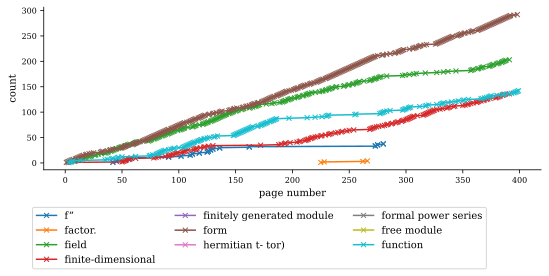

In [11]:
fig,ax = plt.subplots(1,1,figsize=(8,4))
ff=10
num_plot=10
ini_=50
for node in node_list[ini_:ini_+num_plot]:
    ax.plot(dict_node_appearances[node],range(1,len(dict_node_appearances[node])+1),marker='x',label=node, markersize=5)
ax.legend(ncol=3,bbox_to_anchor=(.9,-.2),fontsize=ff)
xlab_='page number';
ylab_='count';
simpleaxis(ax,xlab_,ylab_)

# ax.set_yscale('log',base=10)
# ax.set_xscale('log',base=10)


# Extracting the section names from Index 


In [12]:
# file = pdfplumber.open('Kenneth M Hoffman, Ray Kunze - Linear Algebra -Prentice Hall (1971).pdf')
file = pdfplumber.open('Linear Algebra, 2Nd Edition - Kenneth Hoffmann And Ray Kunze.pdf')

node_list = []
all_sections=[]

for x in range(5,8):
# for x in range(6,7):
    
    text_=file.pages[x].extract_text()
    text_list = text_.split('\n')
#     text_list = [text for text in text_list if text[0].isdigit()]
    text_list_new=[]
    for line_ in range(len(text_list)):
        
        text=text_list[line_]
        
        if (text[0].isdigit()) and (text.rstrip()[-1].isdigit()):
            text_list_new.append(text)
        elif (text[0].isdigit()) and ((line_+1)<=(len(text_list)-1)):
            text_list_new.append(text+text_list[line_+1])
#         if '8.4' in text:
#             print(text,'\n conditions-\n',text[0].isdigit() and text.rstrip()[-1].isdigit(),'\n',text+text_list[line_+1])
#             print(text_list[line_+1])
            
            
    
    
#     text_list_new = [text.rstrip('1234567890') for text in text_list_new]
    text_list_new=[x for x in text_list_new if len(x)>5]
    all_sections=all_sections+(text_list_new)
all_sections=[x[0:len(x)-4].lower().rstrip() for x in all_sections]
# all_sections=[x.split('.')[-1].lstrip() for x in all_sections]
all_sections= [re.sub('\s+',' ',x) for x in all_sections]
all_sections=[x.split('.')[-1].lstrip() for x in all_sections]
all_sections= [re.sub(r'[0-9]+', '', x) for x in all_sections]
all_sections=[x.lstrip() for x in all_sections]
all_sections



['fields',
 'systems of linear equations',
 'matrices and elementary row operations',
 'row-reduced echelon matrices',
 'matrix multiplication',
 'invertible matrices',
 'vector spaces',
 'subspaces',
 'bases and dimension',
 'coordinates',
 'summary of row-equivalence',
 'computations concerning subspaces',
 'linear transformations',
 'the algebra of linear transformations',
 'isomorphism',
 'representation of transformations by matrices',
 'linear functionals',
 'the double dual',
 'the transpose of a linear transformation',
 'algebras',
 'the algebra of polynomials',
 'lagrange interpolation',
 'polynomial ideals',
 'the prime factorization of a polynomial',
 'commutative rings',
 'determinant functions',
 'permutations and the uniqueness of determinants',
 'additional properties of determinants',
 'modules',
 'multilinear functions',
 'the grassman ring',
 'introduction',
 'characteristic values',
 'annihilating polynomials',
 'invariant subspaces',
 'simultaneous triangulation; si

In [ ]:
import numpy as np
all_sections=[x.split('.')[-1].lstrip() for x in all_sections]

it_section=0
dict_section_page_line={}

for x in range(8,394):
    text_=file.pages[x].extract_text()
    text_=text_.lower()
    text_list = text_.split('\n')
#     x=text_list[1]
    xx=[x.split('.') for x in text_list]
    text_new=[y[-1].rstrip().lstrip() for y in xx]
    text_new=[re.sub('\s+',' ',x) for x in text_new]
    line_num=np.where(all_sections[it_section]== np.array(text_new))[0]
    
    
    if line_num.shape[0]>0:
#         print(it_section)
        dict_section_page_line[str(it_section)+'.'+all_sections[it_section]]= [x,line_num]
        it_section=it_section+1
    else:
        for it__ in range(len(text_new)-2):
            joined_=text_new[it__]+' '+text_new[it__+1]
            if x==13:
                print(joined_)
            if re.sub('\s+',' ',joined_)==all_sections[it_section]:
                line_num=it__
                dict_section_page_line[str(it_section)+'.'+all_sections[it_section]]= [x,line_num]
                it_section=it_section+1
                break
        for it__ in range(len(text_new)-1):
            joined_=text_new[it__]
#             if x==13:
#                 print(joined_)
            if re.sub('\s+',' ',joined_).replace(' ','')==all_sections[it_section].replace(' ',''):
                line_num=it__
                dict_section_page_line[str(it_section)+'.'+all_sections[it_section]]= [x,line_num]
                it_section=it_section+1
                break


    
    if it_section==len(all_sections):
        break
dict_section_page_line


1 matrices and elementary
matrices and elementary row operations


In [ ]:
line_num=[]
for key in dict_section_page_line.keys():
    if type(dict_section_page_line[key][1])==np.ndarray:

        dict_section_page_line[key][1]=dict_section_page_line[key][1][0]

In [ ]:
# cut the book into subsections

dict_section_text={}
page_nums=[]
for key in dict_section_page_line.keys():
    page_nums.append(dict_section_page_line[key][0])
text_section=[]    
section_names=list(dict_section_page_line.keys())
it_section=0
for x in range(8,394):
    
    text_=file.pages[x].extract_text()
    text_=text_.lower()
    text_list = text_.split('\n')
    
    if (x in page_nums) and x>8:
        it_section=it_section+1
        key=section_names[it_section]
#         print('line_num-----',dict_section_page_line[key][1])
        text_section.append(text_list[1:dict_section_page_line[key][1]])
        dict_section_text[section_names[it_section-1]]=text_section
        text_section=text_list[dict_section_page_line[key][1]:-1]
    else:
        text_section.append(text_list[1:-1])
        
# #     x=text_list[1]
#     xx=[x.split('.') for x in text_list]
#     text_new=[y[-1].rstrip().lstrip() for y in xx]
#     text_new=[re.sub('\s+',' ',x) for x in text_new]
#     line_num=np.where(all_sections[it_section]== np.array(text_new))[0]
#     print(text_list)
    
#     dict_section_page_line
    
    


In [ ]:
dict_section_textcombined=dict_section_text.copy()
for k in dict_section_text.keys():
#     print(dict_section_text[k],'\n\n')
    text_combined='  '
    y=' '
    
    for xx in dict_section_text[k]:
        for x in xx:
            if text_combined[-2]=='-':
                text_combined=text_combined[0:-2]+x
            else:
                text_combined=text_combined+x
    dict_section_textcombined[k]=text_combined


In [ ]:
x in dict_section_textcombined[list(dict_section_textcombined.keys())[6]]

[]

In [ ]:
# dict_section_keywords_line_no = {keyword: {section: [line_numbers_within_section]}}
dict_section_keywords_line_no={}

glossary_words=node_list.copy()
it_gloss=0
for x in glossary_words:
    print(it_gloss,'==',x,end='\r')
    it_gloss=it_gloss+1
    x_key=x
    x=x.split(' ')

    dict_section_keywords_line_no[x_key]={}

    for k in dict_section_textcombined.keys():
        dict_section_keywords_line_no[x_key][k]=[]
        search_text=dict_section_textcombined[k]
        search_text=[x for x in search_text.split(' ') if x!='']
        for it in range(len(search_text)-1):
            if x == search_text[it:it+len(x)]:
                dict_section_keywords_line_no[x_key][k].append(it)




In [ ]:
# dict_section_keywords_line_no

In [ ]:
# for k in dict_section_textcombined.keys():
#     print(dict_section_textcombined[k],'\n\n')

In [ ]:
#### Quick check that page numbers of subsections where correct by manual inspection

In [ ]:
page_nums=[]
for key in dict_section_page_line.keys():
    page_nums.append(dict_section_page_line[key][0])
np.array(page_nums)-7

In [ ]:
len(dict_section_page_line.keys())

In [77]:
# code to read a page and print it

In [ ]:
it_section=0
dict_section_page_line={}
for x in range(188,190):
    text_=file.pages[x].extract_text()
    text_=text_.lower()
    text_list = text_.split('\n')
#     x=text_list[1]
    xx=[x.split('.') for x in text_list]
    text_new=[y[-1].rstrip().lstrip() for y in xx]
    text_new=[re.sub('\s+',' ',x) for x in text_new]
    
    print(text_new)
    text_new=[re.sub('\s+',' ',x).replace(' ','') for x in text_new]
    print(text_new)


In [79]:
# to_find=all_sections[it_section].split('.')[-1].lstrip()
# to_find
# to_find ==np.array(text_new)

In [80]:
# to_find

# text_=text_.lower()
# text_list = text_.split('\n')
# # x=text_list[1]
# x=[x.split('.') for x in text_list]
# text_new=[y[-1].rstrip().lstrip() for y in x]
# line_num=np.where(all_sections[it_section].split('.')[-1].lstrip() == np.array(text_new))[0][0]
# line_num

In [81]:
text_new[27]

'acharacteristicvalueoftisascalarcinfsuchthat'

In [82]:
# to_find